In [2]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.metrics import plot_confusion_matrix

from utils import load_dataset, compute_performance_metrics, print_metrics_summary

In [3]:
validation_fraction = 1/3
patience = 10

In [4]:
x_train, x_test, y_train, y_test = load_dataset()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(382646, 243) (382646,)
(97300, 243) (97300,)


Em seguida, vamos testar o classificador do tipo Gradient Boosting:


Primeiramente começamos com o classificador com todos parâmetros padrão da biblioteca, exceto os que definem o conjunto de validação e a lógica de early stopping:

In [4]:
gr = GradientBoostingClassifier(n_iter_no_change=patience, validation_fraction=validation_fraction)

In [5]:
gr.fit(x_train, y_train)

GradientBoostingClassifier(n_iter_no_change=10,
                           validation_fraction=0.3333333333333333)

In [6]:
y_pred = gr.predict(x_test)
y_pred_proba = gr.predict_proba(x_test)

Tivemos um bom resultado, com as duas classes com 0.6 de acurácia ou mais, e com a estátistica KS em um patamar parecido com o dos outros classificadores:

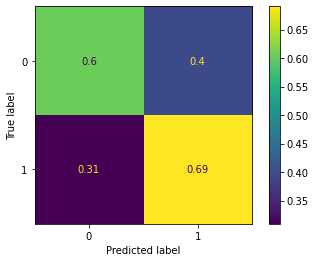

In [7]:
plot_confusion_matrix(gr, x_test, y_test, normalize="true")

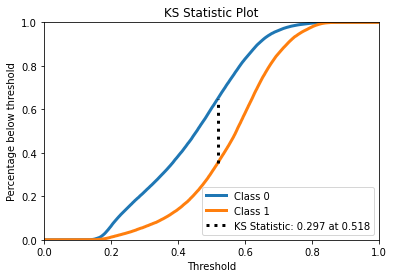


Accuracy:         0.6343
Recall:           0.6909
Precision:        0.4787
F1:               0.5655
AUROC:            0.7053
AUPR:             0.5443


In [8]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

Em seguida, testamos aumentar quantidade de estimadores de 100 para 200 estimadores:

In [9]:
gr1 = GradientBoostingClassifier(n_estimators=200, n_iter_no_change=patience, validation_fraction=validation_fraction)

In [10]:
gr1.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=200, n_iter_no_change=10,
                           validation_fraction=0.3333333333333333)

In [11]:
y_pred = gr1.predict(x_test)
y_pred_proba = gr1.predict_proba(x_test)

Houve uma pequena melhora na acurácia individual das classes segundo a matriz de confusão, mas houve uma melhora considerável no valor para estátistica KS:

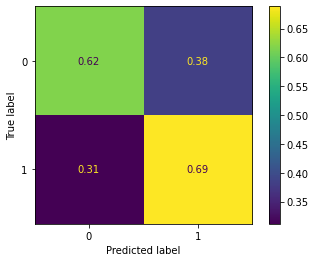

In [12]:
plot_confusion_matrix(gr1, x_test, y_test, normalize="true")

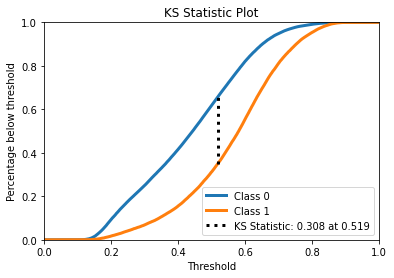


Accuracy:         0.6419
Recall:           0.6884
Precision:        0.4861
F1:               0.5699
AUROC:            0.7107
AUPR:             0.5512


In [13]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

Em seguida, experimentamos aumentar ainda mais a quantidade de estimadores, dessa vez para 300 estimadores:

In [14]:
gr2 = GradientBoostingClassifier(n_estimators=300, n_iter_no_change=patience, validation_fraction=validation_fraction)

In [15]:
gr2.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=300, n_iter_no_change=10,
                           validation_fraction=0.3333333333333333)

In [16]:
y_pred = gr2.predict(x_test)
y_pred_proba = gr2.predict_proba(x_test)

O resultado da matriz de confusão se manteve o mesmo, mas houve uma melhora na estátistica KS:

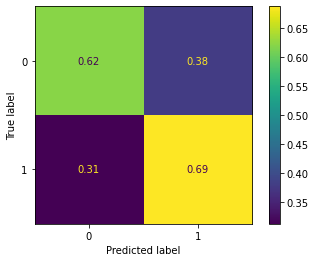

In [17]:
plot_confusion_matrix(gr2, x_test, y_test, normalize="true")

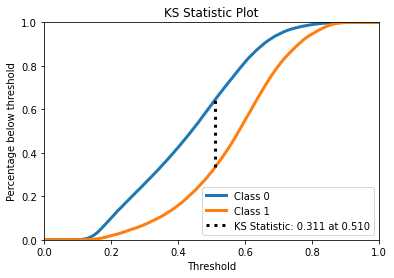


Accuracy:         0.6443
Recall:           0.6882
Precision:        0.4885
F1:               0.5714
AUROC:            0.7124
AUPR:             0.5528


In [18]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

Em seguida variaremos o parâmetro `subsample`, esse parâmetro determina a fração da quantidade dos samples totais que será utilizada para treinar os estimadores base, quando usamos esse parâmetro com um valor menor que 1.0, o classificador passa a ser um classificador de Gradient Boosting estocástico:

In [4]:
gr3 = GradientBoostingClassifier(n_estimators=300, subsample=.5, n_iter_no_change=patience, validation_fraction=validation_fraction)

In [5]:
gr3.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=300, n_iter_no_change=10, subsample=0.5,
                           validation_fraction=0.3333333333333333)

In [6]:
y_pred = gr3.predict(x_test)
y_pred_proba = gr3.predict_proba(x_test)

Ao usar o parâmetro `subsample` com o valor 0.5, a acurácia e a estátistica KS tiveram uma leve piora:

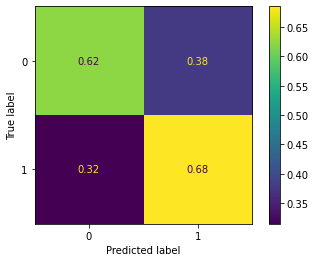

In [7]:
plot_confusion_matrix(gr3, x_test, y_test, normalize="true")

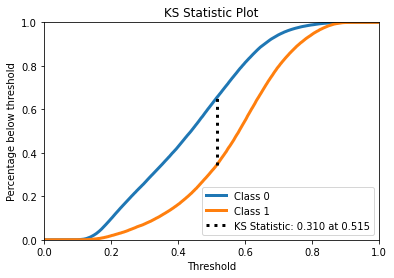


Accuracy:         0.6438
Recall:           0.6849
Precision:        0.4879
F1:               0.5699
AUROC:            0.7107
AUPR:             0.5499


In [8]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

Em seguida testamos usar o parâmtro `subsample`, mas com um valor maior que 0.5, de forma que os estimadores base considerem mais samples:

In [ ]:
gr4 = GradientBoostingClassifier(n_estimators=300, subsample=.7,n_iter_no_change=patience, validation_fraction=validation_fraction)

In [ ]:
gr4.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=300, n_iter_no_change=10, subsample=0.7)

In [ ]:
y_pred = gr4.predict(x_test)
y_pred_proba = gr4.predict_proba(x_test)

Nesse caso não houve nem ganho nem perda em relação ao classificador com esse parâmetro como 1.0, no entanto como esse parâmetro reduziu o tempo necessário para treinar a rede, mantemos ele com o valor 0.7: 

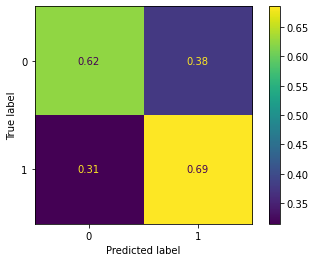

In [ ]:
plot_confusion_matrix(gr4, x_test, y_test, normalize="true")

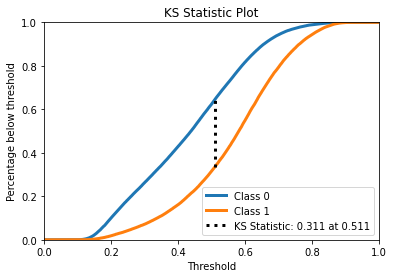


Accuracy:         0.6449
Recall:           0.6855
Precision:        0.4891
F1:               0.5709
AUROC:            0.7123
AUPR:             0.5525


In [ ]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

Em seguida, tentamos aumentar novamente a quantidade de estimadores:

In [9]:
gr5 = GradientBoostingClassifier(n_estimators=400, subsample=.7, n_iter_no_change=patience, validation_fraction=validation_fraction)

In [10]:
gr5.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=400, n_iter_no_change=10, subsample=0.7,
                           validation_fraction=0.3333333333333333)

In [11]:
y_pred = gr5.predict(x_test)
y_pred_proba = gr5.predict_proba(x_test)

Não houve ganho ao adicionar mais estimadores, o que faz com que a mudança não seja justificavel, visto que quanto mais estimadores, maior a complexidade e tempo de treinamento para a rede.

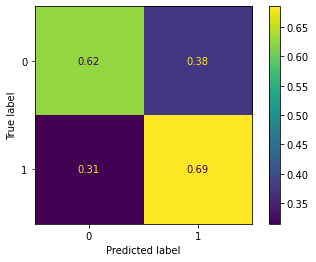

In [12]:
plot_confusion_matrix(gr5, x_test, y_test, normalize="true")

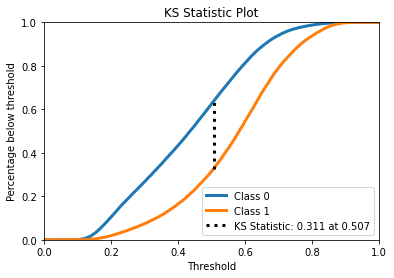


Accuracy:         0.6458
Recall:           0.6853
Precision:        0.4900
F1:               0.5714
AUROC:            0.7123
AUPR:             0.5521


In [13]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

Em seguida, experimentamos aumentar o parâmetro `max_depth`:

In [5]:
gr6 = GradientBoostingClassifier(n_estimators=400, subsample=.7, n_iter_no_change=patience, validation_fraction=validation_fraction, max_depth=6)

In [6]:
gr6.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=6, n_estimators=400, n_iter_no_change=10,
                           subsample=0.7,
                           validation_fraction=0.3333333333333333)

In [7]:
y_pred = gr6.predict(x_test)
y_pred_proba = gr6.predict_proba(x_test)

O tempo de treinamento aumentou bastante, mas nesse caso tivemos um resultado interessante, ambas classes tiveram a mesma acurácia, tivemos também uma melhora na acurácia total, no entanto tivemos uma redução no valor para a estátistica KS:

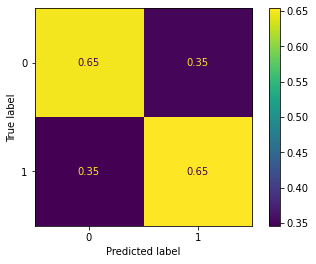

In [8]:
plot_confusion_matrix(gr6, x_test, y_test, normalize="true")

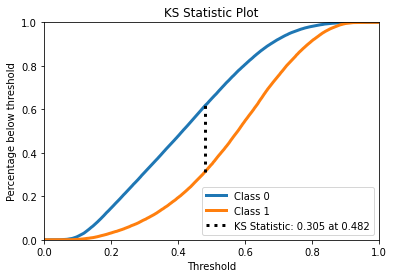


Accuracy:         0.6503
Recall:           0.6538
Precision:        0.4943
F1:               0.5630
AUROC:            0.7088
AUPR:             0.5474


In [9]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

Tentamos também reduzir o `max_depth`:

In [10]:
gr7 = GradientBoostingClassifier(n_estimators=400, subsample=.7, n_iter_no_change=patience, validation_fraction=validation_fraction, max_depth=2)

In [11]:
gr7.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=400, n_iter_no_change=10,
                           subsample=0.7,
                           validation_fraction=0.3333333333333333)

In [12]:
y_pred = gr7.predict(x_test)
y_pred_proba = gr7.predict_proba(x_test)

Nesse caso, tivemos um resultado parecido com os anteriores, mas com uma redução no valor para a curva KS:

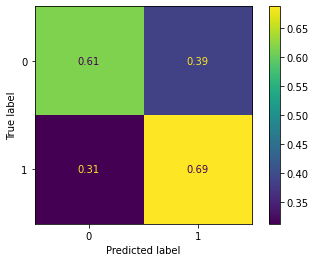

In [13]:
plot_confusion_matrix(gr7, x_test, y_test, normalize="true")

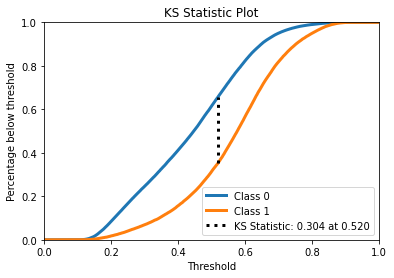


Accuracy:         0.6391
Recall:           0.6867
Precision:        0.4833
F1:               0.5673
AUROC:            0.7072
AUPR:             0.5471


In [14]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)